### CNN Usado para classificar documentos

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [2]:
mnist = tf.keras.datasets.mnist ## 28x 28 digitos de 0 a 9 escritos a mão
(x_train, y_train), (x_test, y_test) = mnist.load_data()
##normalize the mnist values
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.3228 - acc: 0.9092
Epoch 2/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.1207 - acc: 0.9632
Epoch 3/3
60000/60000 [==============================] - 4s 67us/step - loss: 0.0800 - acc: 0.9751


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 31us/step
(0.08965406877594069, 0.973)


In [4]:
model.save('epic_num_reader.model')

In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))

7


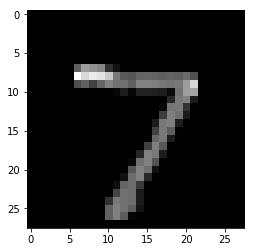

In [6]:
plt.imshow(x_test[0], cmap='gray')
#print(x_test[0])

### Inserindo imagens do código postal

In [7]:
def trataImg(img):
    img = img[8:-9, 1:-1]
    img = cv2.copyMakeBorder(img, 2, 2, 2, 2, borderType = cv2.BORDER_CONSTANT, value=255 )
    img = cv2.resize(img, (28, 28))
    ret,img_t = cv2.threshold(img,185,255,cv2.THRESH_BINARY_INV)
    img_t = cv2.GaussianBlur(img_t,(5,5),0)
    #img_t[np.where(img_t > [185])] = [0]
    return img_t

In [8]:
img1_0 = cv2.imread('test_ml/1.jpg', cv2.IMREAD_GRAYSCALE)
img2_6 = cv2.imread('test_ml/2.jpg', cv2.IMREAD_GRAYSCALE)
img3_3 = cv2.imread('test_ml/3.jpg', cv2.IMREAD_GRAYSCALE)
img4_6 = cv2.imread('test_ml/4.jpg', cv2.IMREAD_GRAYSCALE)
img5_4 = cv2.imread('test_ml/5.jpg', cv2.IMREAD_GRAYSCALE)
img6_2 = cv2.imread('test_ml/6.jpg', cv2.IMREAD_GRAYSCALE)
img7_1 = cv2.imread('test_ml/7.jpg', cv2.IMREAD_GRAYSCALE)
img8_0 = cv2.imread('test_ml/8.jpg', cv2.IMREAD_GRAYSCALE)

img1_0 = trataImg(img1_0)
img2_6 = trataImg(img2_6)
img3_3 = trataImg(img3_3)
img4_6 = trataImg(img4_6)
img5_4 = trataImg(img5_4)
img6_2 = trataImg(img6_2)
img7_1 = trataImg(img7_1)
img8_0 = trataImg(img8_0)

cv2.imwrite('test_ml/img1_te.jpg', img1_0)
cv2.imwrite('test_ml/img2_te.jpg', img2_6)
cv2.imwrite('test_ml/img3_te.jpg', img3_3)
cv2.imwrite('test_ml/img4_te.jpg', img4_6)
cv2.imwrite('test_ml/img5_te.jpg', img5_4)
cv2.imwrite('test_ml/img6_te.jpg', img6_2)
cv2.imwrite('test_ml/img7_te.jpg', img7_1)
cv2.imwrite('test_ml/img8_te.jpg', img8_0)

True

In [9]:
img1_0 = cv2.normalize(img1_0, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img2_6 = cv2.normalize(img2_6, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img3_3 = cv2.normalize(img3_3, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img4_6 = cv2.normalize(img4_6, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img5_4 = cv2.normalize(img5_4, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img6_2 = cv2.normalize(img6_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img7_1 = cv2.normalize(img7_1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img8_0 = cv2.normalize(img8_0, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


x_test_p = [img1_0, img2_6, img3_3, img4_6, img5_4, img6_2, img7_1, img8_0]
x_test_p = tf.keras.utils.normalize(x_test_p, axis = 1)
y_test_p = [0, 6, 3, 6, 4, 2, 1, 0]

In [10]:
predictions = new_model.predict([x_test_p])
for i in range(len(predictions)):
    print(np.argmax(predictions[i]), y_test_p[i])

(0, 0)
(2, 6)
(3, 3)
(6, 6)
(4, 4)
(2, 2)
(4, 1)
(0, 0)


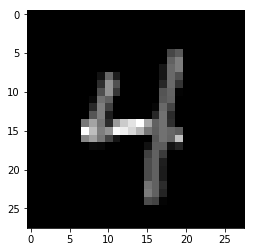

In [11]:
plt.imshow(x_test[19],cmap='gray')

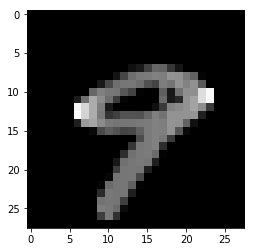

In [12]:
plt.imshow(x_test[9],cmap='gray')

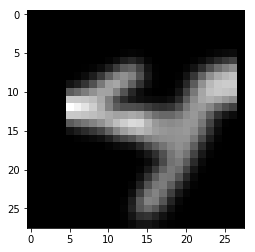

In [13]:
plt.imshow(x_test_p[4],cmap='gray')